In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np

In [2]:
books=pd.read_csv("Books.csv")
users=pd.read_csv("Users.csv")
ratings=pd.read_csv("Ratings.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## Books Dataset Pre-processing

In [4]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271359 non-null object
Year-Of-Publication    271360 non-null object
Publisher              271358 non-null object
Image-URL-S            271360 non-null object
Image-URL-M            271360 non-null object
Image-URL-L            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books=books.drop(['Image-URL-S','Image-URL-L'],axis=1)

In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-M            0
dtype: int64

In [9]:
books.loc[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


In [10]:
books.at[187689,'Book-Author']= 'Unknown'

In [11]:
books.loc[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...


In [12]:
books.at[128890,'Publisher']= 'Unknown'

In [13]:
books.at[129037,'Publisher']= 'Unknown'

In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271360 non-null object
Year-Of-Publication    271360 non-null object
Publisher              271360 non-null object
Image-URL-M            271360 non-null object
dtypes: object(6)
memory usage: 12.4+ MB


In [15]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [16]:
books.loc[books['Year-Of-Publication']=='DK Publishing Inc'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [17]:
books.loc[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...


In [18]:
books.at[209538,'Year-Of-Publication']=='2000'

False

In [19]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [20]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(int)

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271360 non-null object
Year-Of-Publication    271360 non-null int32
Publisher              271360 non-null object
Image-URL-M            271360 non-null object
dtypes: int32(1), object(5)
memory usage: 11.4+ MB


In [22]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [23]:
books['Year-Of-Publication'].mean()

1959.7612728478773

In [24]:
from collections import Counter

In [25]:
count = Counter(books['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

In [26]:
books.loc[books['Year-Of-Publication']==0,'Year-Of-Publication']=2002
books.loc[books['Year-Of-Publication']>2021,'Year-Of-Publication']=2002

In [27]:
books['ISBN']=books['ISBN'].str.upper()

In [28]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
6635,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),Nathaniel Hawthorne,1994,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.0...
16298,097089726X,Jasper,Michelle Groce,2003,Novello Festival Press,http://images.amazon.com/images/P/097089726X.0...
19266,039592720X,Interpreter of Maladies,Jhumpa Lahiri,1999,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.0...
22339,042512164X,Capital Crimes,Lawrence Sanders,2000,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.0...
24871,067174139X,"Masks (Star Trek The Next Generation, No 7)",John Vornholt,1991,Star Trek,http://images.amazon.com/images/P/067174139X.0...
25711,006051406X,Molly Moon's Incredible Book of Hypnotism (Mol...,Georgia Byng,2003,HarperCollins,http://images.amazon.com/images/P/006051406X.0...
26895,051513581X,Dale Brown's Dreamland: Piranha (Dreamland (Ha...,Dale Brown,2003,Jove Books,http://images.amazon.com/images/P/051513581X.0...
27167,038533348X,Cat's Cradle,Kurt Vonnegut,1998,Delta,http://images.amazon.com/images/P/038533348X.0...
27688,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,http://images.amazon.com/images/P/080410753X.0...


In [29]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271360 non-null object
Year-Of-Publication    271360 non-null int32
Publisher              271360 non-null object
Image-URL-M            271360 non-null object
dtypes: int32(1), object(5)
memory usage: 11.4+ MB


In [30]:
books=books.drop_duplicates ()
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...


In [31]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271047 entries, 0 to 271359
Data columns (total 6 columns):
ISBN                   271047 non-null object
Book-Title             271047 non-null object
Book-Author            271047 non-null object
Year-Of-Publication    271047 non-null int32
Publisher              271047 non-null object
Image-URL-M            271047 non-null object
dtypes: int32(1), object(5)
memory usage: 13.4+ MB


In [32]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [33]:
import seaborn as sns


In [34]:
# ooks Data Visualization

AttributeError: module 'seaborn' has no attribute 'set_theme'

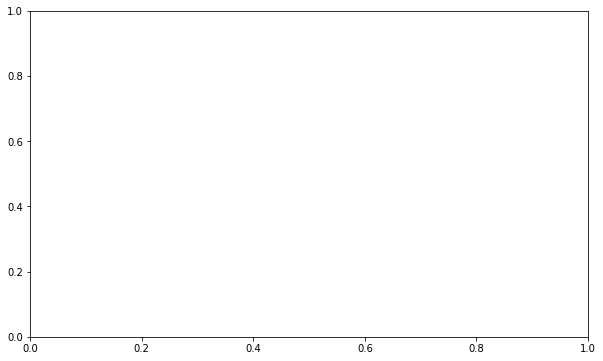

In [35]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['Year-Of-Publication'].value_counts()[:10].index,y = books['Year-Of-Publication'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top 10 years with the most books published',xlabel = 'year',ylabel = 'number of books')
plt.xticks(rotation = 60)
plt.show()


In [ ]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['Publisher'].value_counts()[:20].index,y = books['Publisher'].value_counts()[:20].values,
            palette = 'viridis_r').set(title = 'Top 20 publishers with most books published',xlabel = 'publisher name',ylabel = 'count of books published')
plt.xticks(rotation = 80)
plt.show()

In [ ]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['Book-Author'].value_counts()[:10].index,y = books['Book-Author'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top 10 authors with most books written',xlabel = "author's name",ylabel = 'count of books written')
plt.xticks(rotation = 80)
plt.show()

In [36]:
books.rename(columns={'Book-Title':'book_title'},inplace=True)

In [37]:
books.head()

,ISBN,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [38]:
#*******************************************************************************

In [39]:
## Users Dataset Pre-processing

In [40]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [41]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
User-ID     278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [42]:
print (users.isna().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [43]:
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [44]:
mean = round(users['Age'].mean()) 
mean

35

In [45]:
users.loc[users['Age'] > 90, 'Age'] = mean   
users.loc[users['Age'] < 6, 'Age'] = mean    
users['Age'] = users['Age'].fillna(mean)     


In [46]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
User-ID     278858 non-null int64
Location    278858 non-null object
Age         278858 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [47]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",35.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",35.0


In [48]:
# Users Data Visualization

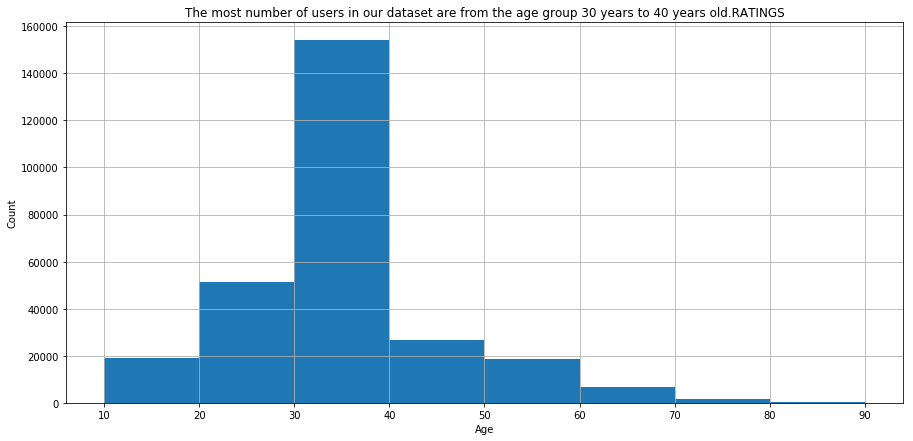

In [49]:
plt.figure(figsize=(15,7))
users.Age.hist(bins=[10*i for i in range(1,10)])     
plt.style="darkgrid"
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("The most number of users in our dataset are from the age group 30 years to 40 years old.RATINGS")
plt.show()

In [51]:
users.rename(columns={'User-ID':'user_id'},inplace=True)

In [52]:
#************************************************************************************************

In [53]:
## Ratings Dataset Pre-processing

In [54]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [55]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [56]:
ratings.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [57]:
from pandas.api.types import is_numeric_dtype
print(is_numeric_dtype(ratings['Book-Rating']))

True


In [58]:
print(is_numeric_dtype(ratings['User-ID']))

True


In [59]:
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [60]:
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [61]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [62]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [63]:
# Ratings Data Visualization

AttributeError: module 'seaborn' has no attribute 'set_theme'

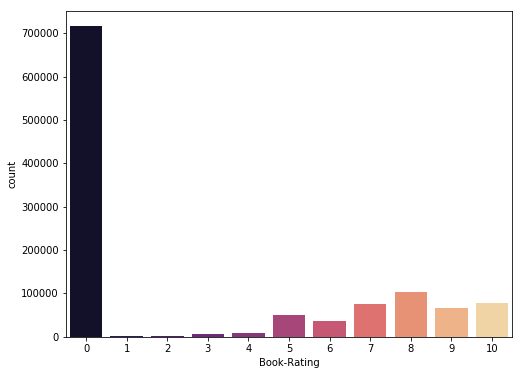

In [64]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings, palette = 'magma')
sns.set_theme(style="darkgrid",context = 'notebook')
plt.title("Ratings")

In [70]:
plt.figure(figsize=(8,6))
data = ratings[ratings['Book-Rating'] != 0]
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(x="Book-Rating", data=data, palette = 'magma')
plt.title("Explicit Ratings")

KeyError: 'Book-Rating'

<Figure size 576x432 with 0 Axes>

In [71]:
ratings.rename(columns={'Book-Rating':'book_rating'},inplace=True)
ratings.rename(columns={'User-ID':'user_id'},inplace=True)

In [72]:
ratings.head()

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [73]:
#***********************************************************************************************************

In [74]:
# Mearge Datasets 

In [75]:
dataset = pd.merge(books, ratings, on='ISBN', how='inner')
dataset
dataset = pd.merge(dataset, users, on='user_id', how='inner')

In [76]:
dataset.head(5)

,ISBN,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,user_id,book_rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",35.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",35.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",35.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",35.0


In [77]:
dataset1 = dataset[dataset['book_rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
dataset1.shape

(383892, 10)

In [78]:
dataset2 = dataset[dataset['book_rating'] == 0]
dataset2 = dataset1.reset_index(drop = True)
dataset2.shape

(383892, 10)

In [79]:
dataset.head()

,ISBN,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,user_id,book_rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",35.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",35.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",35.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",35.0


In [80]:
#item based similarity

In [81]:
dataset.head(2)

,ISBN,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,user_id,book_rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",35.0


In [82]:
x = dataset.groupby('user_id').count()['book_rating'] > 200
Best_users = x[x].index

In [83]:
filtered_rating = dataset[dataset['user_id'].isin(Best_users)]
filtered_rating['user_id'].unique().shape

(811,)

In [84]:
y = filtered_rating.groupby('book_title').count()['book_rating']>=80
famous_books = y[y].index

In [85]:
final_ratings = filtered_rating[filtered_rating['book_title'].isin(famous_books)]

In [86]:
final_ratings['user_id'].unique().shape

(807,)

In [87]:
ptable = final_ratings.pivot_table(index='user_id',columns='book_title',values='book_rating')

In [88]:
ptable.fillna(0,inplace=True)

In [89]:
ptable

book_title,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,A Walk to Remember,...,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,Whispers,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,Wish You Well,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,6.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,7.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,10.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,10.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,8.0,0.0,0.0,0.0,0.0,0.0
6323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


#pairwise dist

In [90]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances

In [91]:
similarity_scores=1-pairwise_distances(ptable.values,metric='cosine')

In [92]:
#similarity_scores = cosine_similarity(ptable)

In [95]:
similarity_scores.shape

(807, 807)

In [96]:
user_sim_df = pd.DataFrame(similarity_scores)

In [97]:

user_sim_df.index=final_ratings['user_id'].unique()
user_sim_df.columns=final_ratings['user_id'].unique()

In [98]:
np.fill_diagonal(similarity_scores,0,wrap=False)
user_sim_df.iloc[0:5,0:5]
user_sim_df

,11676,85526,96054,177458,110912,137688,197659,36836,46398,113270,...,69808,88677,216012,277639,164465,54218,148199,164828,165232,72352
11676,0.000000,0.000000,0.000000,0.171457,0.000000,0.000000,0.000000,0.323345,0.000000,0.097609,...,0.099396,0.000000,0.000000,0.092115,0.000000,0.129159,0.148398,0.000000,0.000000,0.000000
85526,0.000000,0.000000,0.182006,0.000000,0.000000,0.000000,0.387202,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.187433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96054,0.000000,0.182006,0.000000,0.000000,0.000000,0.228887,0.000000,0.000000,0.171623,0.085829,...,0.000000,0.000000,0.115385,0.000000,0.069370,0.000000,0.000000,0.000000,0.000000,0.000000
177458,0.171457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134185,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
110912,0.000000,0.000000,0.000000,0.000000,0.000000,0.172158,0.000000,0.000000,0.000000,0.000000,...,0.150130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
137688,0.000000,0.000000,0.228887,0.000000,0.172158,0.000000,0.000000,0.124884,0.000000,0.065267,...,0.111508,0.028608,0.000000,0.000000,0.119084,0.000000,0.000000,0.000000,0.000000,0.000000
197659,0.000000,0.387202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36836,0.323345,0.000000,0.000000,0.134185,0.000000,0.124884,0.000000,0.000000,0.000000,0.195221,...,0.151689,0.038746,0.000000,0.000000,0.117603,0.000000,0.000000,0.068006,0.000000,0.000000
46398,0.000000,0.000000,0.171623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.189832,0.000000,0.000000,0.069553,0.000000,0.000000,0.000000,0.000000
113270,0.097609,0.000000,0.085829,0.000000,0.000000,0.065267,0.000000,0.195221,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099912,0.080235,0.000000,0.000000


In [99]:
user_sim_df.sort_values([137688],ascending=False).head(100)

,11676,85526,96054,177458,110912,137688,197659,36836,46398,113270,...,69808,88677,216012,277639,164465,54218,148199,164828,165232,72352
140000,0.000000,0.000000,0.208770,0.148926,0.181145,0.404719,0.000000,0.065701,0.000000,0.000000,...,0.218426,0.061158,0.036023,0.000000,0.055689,0.000000,0.000000,0.000000,0.000000,0.000000
94347,0.000000,0.125936,0.133444,0.000000,0.201236,0.401875,0.000000,0.104269,0.000000,0.000000,...,0.000000,0.066880,0.000000,0.000000,0.099427,0.000000,0.000000,0.000000,0.000000,0.000000
60277,0.000000,0.000000,0.000000,0.000000,0.000000,0.348971,0.000000,0.000000,0.000000,0.124107,...,0.000000,0.044763,0.000000,0.000000,0.000000,0.000000,0.025158,0.000000,0.000000,0.000000
104665,0.000000,0.000000,0.182670,0.000000,0.000000,0.339713,0.000000,0.155987,0.000000,0.042626,...,0.000000,0.076871,0.000000,0.000000,0.148743,0.000000,0.000000,0.097579,0.000000,0.000000
96448,0.213009,0.132163,0.262795,0.000000,0.000000,0.324100,0.000000,0.194533,0.000000,0.180741,...,0.000000,0.101858,0.000000,0.119930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7346,0.000000,0.000000,0.219439,0.000000,0.000000,0.303245,0.000000,0.000000,0.000000,0.161298,...,0.000000,0.000000,0.171333,0.000000,0.000000,0.000000,0.098090,0.058350,0.000000,0.000000
159033,0.050443,0.067052,0.172422,0.236678,0.000000,0.301755,0.000000,0.089618,0.000000,0.223512,...,0.115553,0.059798,0.000000,0.000000,0.000000,0.098721,0.099578,0.112454,0.000000,0.000000
107301,0.066299,0.121855,0.156674,0.000000,0.222531,0.290065,0.112395,0.102331,0.047603,0.095969,...,0.139089,0.273943,0.071120,0.000000,0.000000,0.076415,0.090483,0.064337,0.070478,0.000000
261105,0.000000,0.000000,0.163034,0.000000,0.000000,0.277542,0.000000,0.000000,0.000000,0.192333,...,0.153387,0.120064,0.056575,0.070683,0.000000,0.000000,0.000000,0.076204,0.000000,0.000000
53628,0.088690,0.046896,0.225758,0.000000,0.000000,0.275871,0.000000,0.135464,0.000000,0.279244,...,0.036735,0.115656,0.144760,0.000000,0.000000,0.095470,0.097502,0.116000,0.000000,0.000000


In [113]:
def get_rec(userid):
    tem=list(user_sim_df.sort_values([userid],ascending=False).head(5).index)
    print(tem)
    book_list=[]
    for i in tem:
        book_list=book_list+list(final_ratings[final_ratings["user_id"]==i]['book_title'][1:3])
        #print(book_list)
    return set(book_list)-set(final_ratings[final_ratings['user_id']==userid]['book_title'][1:8])

In [114]:
get_rec(85526)

[197659, 177072, 21014, 203799, 14422]


{'All That Remains (Kay Scarpetta Mysteries (Paperback))',
 'Breathing Lessons',
 'Congo',
 'Fried Green Tomatoes at the Whistle Stop Cafe',
 'Isle of Dogs',
 'Little Altars Everywhere: A Novel',
 'The Firm',
 'The Joy Luck Club',
 'The Rescue',
 'Wicked: The Life and Times of the Wicked Witch of the West'}

In [103]:
B=final_ratings[(final_ratings["user_id"]==85526)]
B[B['book_title']=="The Rescue"]


,ISBN,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,user_id,book_rating,Location,Age


{"Angela's Ashes: A Memoir",
 'Empire Falls',
 'Girl with a Pearl Earring',
 'The Five People You Meet in Heaven',
 'The Red Tent (Bestselling Backlist)',
 'The Secret Life of Bees',
 'Three Junes'}

In [105]:
import pickle

In [109]:
pickle.dump(user_sim_df,open('recommend_nation.pkl','wb'))

In [110]:
pickle.dump(final_ratings,open('data_file.pkl','wb'))